<img src="../resources/cropped-SummerWorkshop_Header.png">  

<h1 align="center">Neuropixels Dataset Exercises </h1> 
<h2 align="center">Summer Workshop on the Dynamic Brain </h2> 
<h3 align="center">Wednesday, August 28, 2019</h3> 

<img src="../resources/EphysObservatory/neuropixels.png" height="250" width="250"> 

In [46]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys import ecephys_session
%matplotlib inline

# fix slow autocomplete
%config Completer.use_jedi = False

# Exercises

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 1: Recordings across visual areas</b> 
<br>
To start, load an `EcephysProjectCache` and use the sessions table from get_sessions to select and load an experimental session containing data from all 6 visual areas ('VISp','VISl','VISal','VISrl','VISam','VISpm').
</div>

In [47]:
manifest_path = os.path.join("/allen/scratch/aibstemp/nileg/cache_dir_08_13/manifest.json")
cache = EcephysProjectCache.fixed(manifest=manifest_path)
sessions = cache.get_sessions()

vis_areas = ['VISp','VISl','VISal','VISrl','VISam','VISpm']

In [49]:
vis_session_list = []
for session_id in sessions.index:
    session_areas = sessions.structure_acronyms.loc[session_id]
    vis_areas_in_session = [area for area in vis_areas if area in session_areas]
    if len(vis_areas_in_session)==6:
        vis_session_list.append(session_id)
print(vis_session_list)

[750749662, 755434585, 756029989]


In [50]:
# A more complex alternative using some advanced features
all_areas = lambda session_areas : all(area in session_areas for area in vis_areas)
sessions[sessions.structure_acronyms.apply(all_areas)].head()

,session_type,specimen_id,genotype,gender,age_in_days,project_code,probe_count,channel_count,unit_count,has_nwb,structure_acronyms
id,,,,,,,,,,,
750749662,brain_observatory_1.1,726162197,wt,M,92.0,NeuropixelVisualCoding,6,509,813,True,"[CA, DG, MB, TH, VISal, VISam, VISl, VISp, VIS..."
755434585,brain_observatory_1.1,730760270,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,0.0,NeuropixelVisualCoding,6,419,688,True,"[CA, DG, MB, TH, VISal, VISam, VISl, VISp, VIS..."
756029989,brain_observatory_1.1,734865738,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,0.0,NeuropixelVisualCoding,6,436,714,True,"[CA, DG, MB, TH, VISal, VISam, VISl, VISp, VIS..."


In [5]:
session_id = 750749662
session = cache.get_session_data(session_id)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 2: Activity across visual areas</b> 
<br>
Make a series of raster plots showing spiking activity from 20 units recorded from each of the 6 visual cortical areas. To do this,

<ol>
    <li>Loop over areas, using the units table to select the units in a given area.</li>
    <li>Loop over 20 units in each area--extract unit spike times from the session and plot raster.</li>
</ol>
</div>

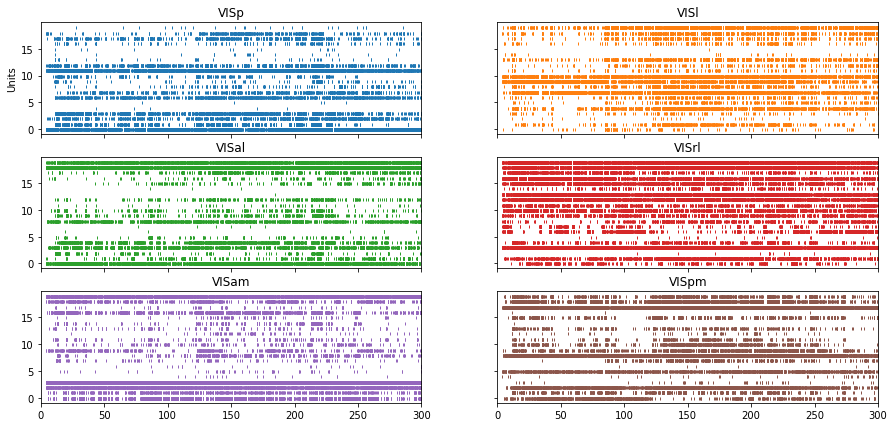

In [6]:
#SOLUTION
# Raster plot showing 20 units simultaneously recorded in each of 6 areas

regions =  ('VISp','VISl','VISal','VISrl','VISam','VISpm')

# Figure setup
fig,ax = plt.subplots(3,2,figsize=(15,7),sharex=True,sharey=True)

#The ravel command gets the six axes (3*2) into a single list.
ax = ax.ravel()     

#List of colors so that a unique color can be used for each plot. 
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i_axis, region in enumerate(regions):
    # Get units in one visual cortical region
    vis_unit_list = session.units[session.units.structure_acronym==region].index
    
    # Plot spike times for 20 units
    for i,unit in enumerate(vis_unit_list[:20]):
        spike_times =  session.spike_times[unit]                       #Extract spike times for each unit from probe spiketimes
        ax[i_axis].plot(spike_times,i*np.ones_like(spike_times),'|',color=colors[i_axis],markersize=3) #fill in the first two entries here
        ax[i_axis].set_title(region)                           #Use region name as title for each subplot 

        
plt.xlim(0,300)
ax[0].set_ylabel('Units')
plt.show()

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 3: ISI distributions</b>
<ol>
    <li>For a single unit, plot the inter-spike interval distribution with 1 ms bins. Show 2 graphs with different x-limits: (0, 20 ms) and (0, 200 ms).
    <li>Get spike times for 50 units with highest SNR and at least 3000 total spikes.</li>
    <li>Plot ISI distribution for each unit (a single plot each).</li>
    <li>Do the ISI distributions vary between cells?</li>
</ol>
</div>

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
  
Hints: Use the function np.diff to compute the difference between adjacent spike times (i.e. the inter-spike interval). `plt.subplots(...sharex=True)` will help keep all your subplots on the same scale automatically so they can be easily compared.
</div>

In [7]:
#SOLUTION
# Compute inter-spike interval distribution for 1 unit
unit_id = session.units.index.values[0]
unit_spikes = session.spike_times[unit_id]
isi = np.diff(unit_spikes)
isi = isi*1000 # convert to ms
print(isi[:20])

[ 659.2007334  2368.20263476 1513.5683506  2492.26943946 1005.46778531
  211.70023553  546.26727442  229.200255     61.43340168   22.03335785
   16.40001825    8.46667609  104.40011615   20.33335596  380.8670904
  126.16680703  117.96679791   93.06677021  980.66775772   63.3334038 ]


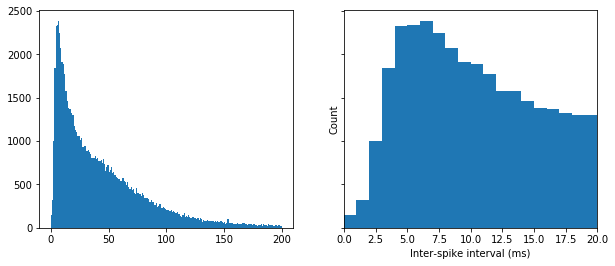

In [8]:
# Plot ISI distribution as histogram with 1 ms bins
fig,ax = plt.subplots(1,2,figsize=(10,4),sharey=True)
ax[0].hist(isi,bins=200,range=(0,200))
ax[1].hist(isi,bins=200,range=(0,200))
ax[1].set_xlim(0,20)
plt.ylabel('Count')
plt.xlabel('Inter-spike interval (ms)')
plt.show()

In [9]:
# Get unit_df with metadata including snr
snr_df = session.units[session.units.structure_acronym == 'VISp']
snr_df = snr_df.sort_values(by=['snr'], ascending=False)
snr_df.head()

,PT_ratio,amplitude,amplitude_cutoff,cluster_id,cumulative_drift,d_prime,firing_rate,isi_violations,isolation_distance,l_ratio,...,channel_local_index,structure_acronym,structure_id,probe_horizontal_position,probe_id,probe_vertical_position,probe_description,lfp_sampling_rate,location,sampling_rate
unit_id,,,,,,,,,,,,,,,,,,,,,
914688661,0.544472,347.048715,0.000252,316,68.36,8.960778,8.761439,0.001974,138.155141,0.000001,...,267,VISp,385.0,27,769322806,2680,probeC,2499.999495,,29999.993938
914688643,0.482654,287.462370,0.019409,305,128.43,3.690615,1.855201,0.055035,36.987604,0.014074,...,261,VISp,385.0,11,769322806,2620,probeC,2499.999495,,29999.993938
914688685,0.442790,227.520345,0.000228,328,65.41,5.931414,6.511648,0.000893,74.504299,0.001154,...,270,VISp,385.0,59,769322806,2720,probeC,2499.999495,,29999.993938
914688635,0.574097,255.365565,0.000049,301,81.91,6.094496,10.623816,0.001343,100.028975,0.003991,...,261,VISp,385.0,11,769322806,2620,probeC,2499.999495,,29999.993938
914688525,0.590136,126.883770,0.000068,246,93.92,8.383671,14.662302,0.000352,174.244638,0.000002,...,232,VISp,385.0,43,769322806,2340,probeC,2499.999495,,29999.993938


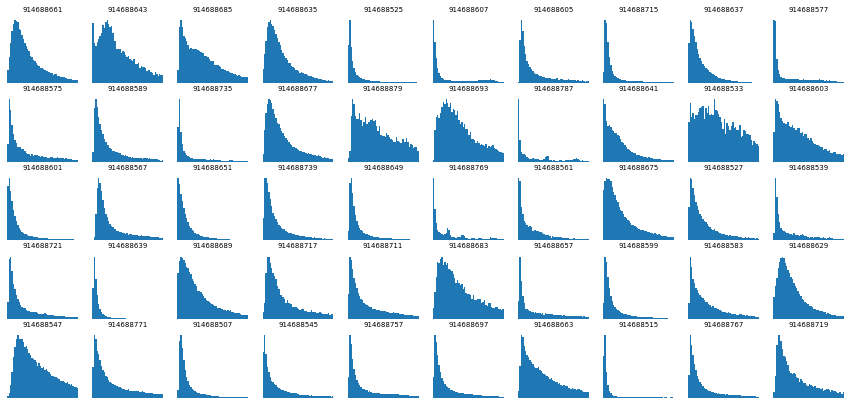

In [10]:
# Get spike times for 50 units with highest SNR and at least 3000 total spikes
unit_list = snr_df.index.values[:50]

# Figure setup
fig,ax = plt.subplots(5,10,figsize=(15,7),sharex=True)
ax = ax.ravel()

# Plot ISI distribution for each unit
for i,unit in enumerate(unit_list):
        unit_spikes = session.spike_times[unit]
        if len(unit_spikes) > 3000:
            isi = np.diff(unit_spikes)
            ax[i].hist(isi,bins=50,range=(0,0.3))
            ax[i].set_title(str(unit_list[i]),fontsize=7)

plt.xlim(0,0.3)

for i in ax:
    i.axis('off')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 4 Dynamics of stimulus-driven spiking</b>
<br>
Explore the peri-stimulus time histogram (PSTH) of some of the high-SNR units you selected. Use the `presentationwise_spike_counts` method to calculate the spike counts in 5 ms bins, for all presentations of a given image. Use a window extending one full stimulus presentation before and after the presentation of interest (showing three presentations total). Then take the mean across presentations to find the PSTH.

Plot a figure with PSTHs for 6 example units for your chosen image. 
</div>

In [11]:
image_id = 46
image_pres = session.stimulus_presentations[
    (session.stimulus_presentations["frame"] == image_id) & 
    (session.stimulus_presentations["stimulus_name"] == "natural_scenes")]

/local1/storage/envs/allensdk3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [12]:
# Make PSTH for each trial with 5 ms bins
bin_width = 0.005
duration = image_pres.duration.mean()
pre_time = -duration
post_time = 2*duration
bins = np.arange(pre_time, post_time+bin_width, bin_width)   
    
histograms = session.presentationwise_spike_counts(
    bin_edges=bins,
    stimulus_presentation_ids=image_pres.index.values,
    unit_ids=None
)
mean_histograms = histograms.mean(dim="stimulus_presentation_id")
rates = mean_histograms/bin_width

/home/tom.chartrand/work/AllenSDK/allensdk/brain_observatory/ecephys/ecephys_session.py:365: UserWarning: You've specified some overlapping time intervals between neighboring rows: [(16, 17)], with a maximum overlap of 0.5047942328910722 seconds.
  warnings.warn(f"You've specified some overlapping time intervals between neighboring rows: {overlapping}, "


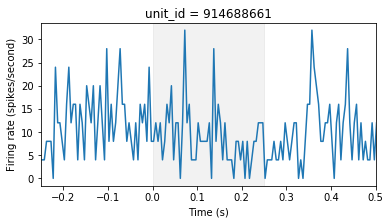

In [13]:
def plot_psth(unit_id, rates, ax=None):
    #Default params
    if not ax:
        fig,ax = plt.subplots(1,1,figsize=(6,3))
   
    rates.loc[{'unit_id':unit_id}].plot(ax=ax)
    ax.axvspan(0, duration, color='gray', alpha=0.1)
    ax.set_ylabel('Firing rate (spikes/second)')
    ax.set_xlabel('Time (s)')
    ax.set_xlim(pre_time,post_time)

unit_id = unit_list[0]
plot_psth(unit_id, rates)

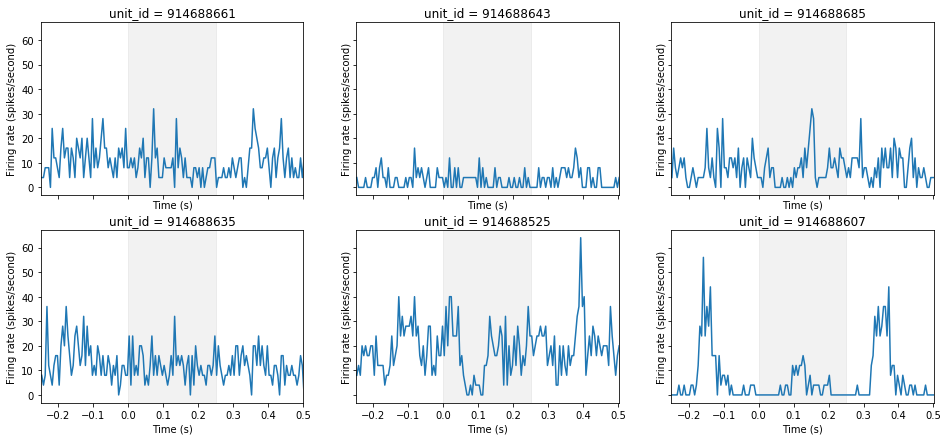

In [14]:
ex_unit_ids = unit_list[:6]
fig,ax = plt.subplots(2, 3, figsize=(16,7), sharex=True, sharey=True)
ax = ax.ravel()

for i, unit_id in enumerate(ex_unit_ids):
    plot_psth(unit_id, rates, ax=ax[i])


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 5: Explore tuning curves for static gratings, using seaborn plotting tools.</b> 
<ol>
    <li>Construct a stim_table for static gratings, and use `get_stimulus_parameter_values` to list the possible values for all stimulus parameters.</li>
    <li>Create a `conditionwise_spike_statistics` table for these stimuli.</li>
    <li>Follow the examples below to show the tuning of the cell across two and three dimensions of stimulus parameters, respectively.</li>
    <li>Explore variations on these plots by changing which columns are assigned to the `x`, `hue`, and `col` parameters.  What combination do you feel represents the data most intuitively? (We'll always want to keep `y="spike_mean"`, since that is the dependent variable here.)</li>
    <li>If you have time, follow the same steps for driting gratings for the same cell and compare the results.</li>
</ol>
</div>

In [15]:
stim_table = session.get_presentations_for_stimulus('static_gratings')
stim_ids = stim_table.index.values

session.get_stimulus_parameter_values(stimulus_presentation_ids=stim_ids)

/home/tom.chartrand/work/AllenSDK/allensdk/brain_observatory/ecephys/ecephys_session.py:852: UserWarning: expected stimulus_names to be a collection (list-like), but found <class 'str'>: static_gratings
  warnings.warn(message)


{'contrast': array([0.8], dtype=object),
 'orientation': array([30.0, 120.0, 60.0, 0.0, 90.0, 150.0], dtype=object),
 'phase': array([0.5, 0.75, 0.25, 0.0], dtype=object),
 'spatial_frequency': array([0.02, 0.16, 0.32, 0.04, 0.08], dtype=object)}

In [16]:
spike_stats = session.conditionwise_spike_statistics(stimulus_presentation_ids=stim_ids, unit_ids=unit_list)
spike_stats = pd.merge(spike_stats, session.stimulus_conditions, on='stimulus_condition_id', right_index=True)
spike_stats.reset_index(inplace=True)

In [17]:
spike_stats.head()

,unit_id,stimulus_condition_id,spike_count,spike_mean,spike_sem,spike_std,stimulus_presentation_count,color,contrast,frame,orientation,phase,x_position,y_position,spatial_frequency,temporal_frequency,stimulus_name
0,914688507,4787,179,3.653061,0.533369,3.733581,49,null,0.8,null,30,0.5,null,null,0.02,null,static_gratings
1,914688515,4787,35,0.714286,0.290144,2.031010,49,null,0.8,null,30,0.5,null,null,0.02,null,static_gratings
2,914688525,4787,174,3.551020,0.462047,3.234329,49,null,0.8,null,30,0.5,null,null,0.02,null,static_gratings
3,914688527,4787,176,3.591837,0.334926,2.344483,49,null,0.8,null,30,0.5,null,null,0.02,null,static_gratings
4,914688533,4787,16,0.326531,0.073701,0.515904,49,null,0.8,null,30,0.5,null,null,0.02,null,static_gratings


**Tuning across two stimulus dimensions**

First, assign to the variable `data` a subset of the `conditionwise_spike_statistics` dataframe for a specific unit id and spatial frequency.

In [18]:
unit_id = 914688507
data = spike_stats[(spike_stats.unit_id==unit_id) & (spike_stats.spatial_frequency==0.16)]

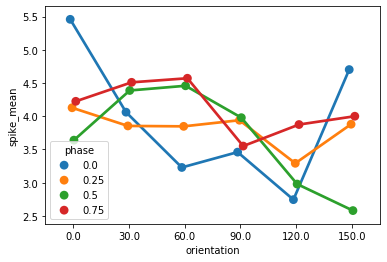

In [19]:
import seaborn as sns
y = "spike_mean"
x = "orientation"
hue = "phase"
sns.pointplot(data=data, x=x, y=y, hue=hue, dodge=True)

**Tuning across three stimulus dimensions**

This time, assign to the variable `data` a subset of the `conditionwise_spike_statistics` dataframe containing all data for a single unit.

In [20]:
data = spike_stats[(spike_stats.unit_id==unit_id)]

/local1/storage/envs/allensdk3/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/local1/storage/envs/allensdk3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/local1/storage/envs/allensdk3/lib/python3.6/site-packages/pandas/core/frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


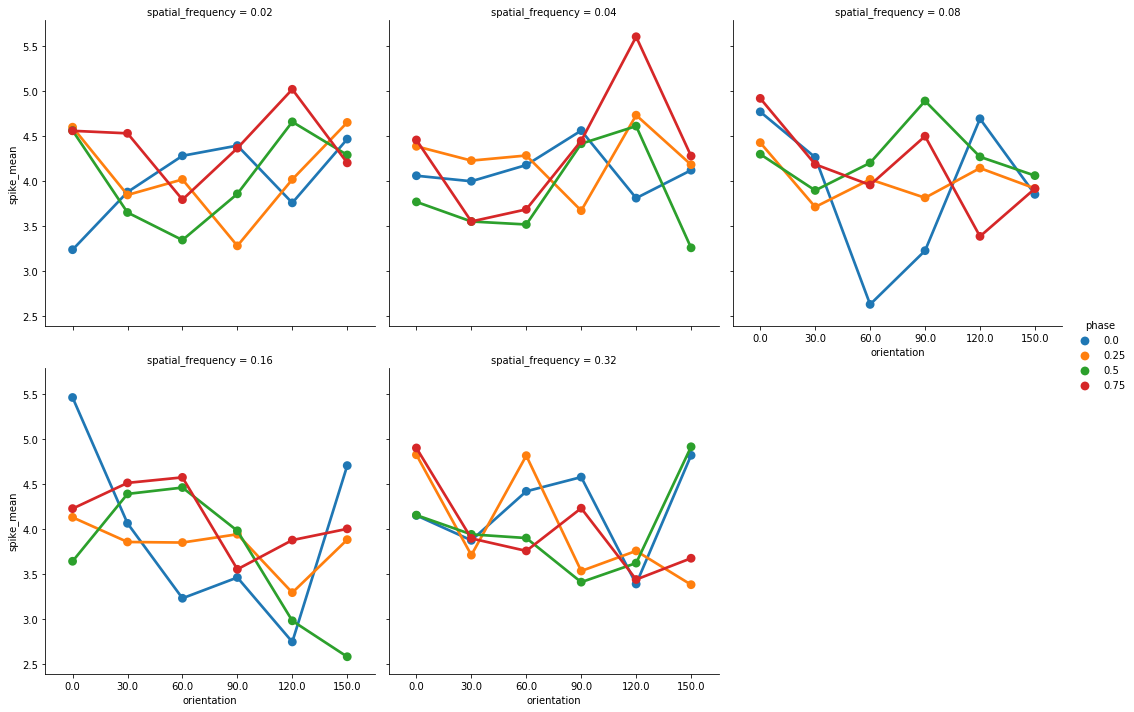

In [21]:
# We want to ignore the 'null' sweeps. By setting them to NaN, seaborn will automatically ignore them.
data[data=='null'] = np.nan
y = "spike_mean"
x = "orientation"
hue = "phase"
col = "spatial_frequency"
sns.catplot(data=data, col=col, x=x, y=y, hue=hue, col_wrap=3, kind='point')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 6: Population correlations and cross-correlograms of spiking activity</b>
<br>
The neural activity is often correlated between the neurons. The relationship between the activity of two units at different time lags is quantified by the cross-correlation. When the cross-correlation is plotted with respect to time lag, we call this a cross-correlogram.
<br>
We can also calculate a single correlation coefficient (at zero lag) for all pairs of recorded units, and visualize this using a matrix representation. In this exercise, you will compute the correlation matrix and compare it between different stimulus presentaitons.
<ol>
    <li>Correlations can be studied on many different timescales. Here we'll use a 10 ms timescale, so use `presentationwise_spike_counts` to create spike histograms for 10 ms time bins.
    <li>Plot cross-correlograms for two arbitatrary units during spontaneous activity and two units during drifting gratings presentation. How different they are? Use the `scipy.signal.correlate` function to calculate the cross-correlation. How different do they look for spontaneous activity and drifting gratings?</li>
    <li>Make sure you are computing the correlation for the same time bins. Different stimuli have different length of presentation</li>
    <li>Compute the linear pearson correlation coefficients for all pairs of the first 100 units, and store them as a correlation matrix. Use `scipy.stats.pearsonr` function. Visualise the matrix using imshow() command. Hint: if the values are constant, it makes sense to assume the correlation to be zero. </li>
    <li>Compare the correlation matrix structure for spontaneous actiivty and drifting gratings for the same units. Hint: to make it more clear, plot the correlations using log10(corr + 1) scaling.</li>
</ol>
</div>

In [22]:
# get the data for the drifting gratings

drift = session.get_presentations_for_stimulus('drifting_gratings')

# get the info about the drifting gratings session
first_drift_id = drift.index.values[0]
first_drift_duration = drift.loc[first_drift_id, "stop_time"] - drift.loc[first_drift_id, "start_time"]

# construct the time domain at 10 ms resolution
time_step = 1 / 100
time_domain = np.arange(0.0, first_drift_duration + time_step, time_step)

histograms_drift = session.presentationwise_spike_counts(
    bin_edges=time_domain,
    stimulus_presentation_ids=drift.index,
    unit_ids=None
)

/home/tom.chartrand/work/AllenSDK/allensdk/brain_observatory/ecephys/ecephys_session.py:852: UserWarning: expected stimulus_names to be a collection (list-like), but found <class 'str'>: drifting_gratings
  warnings.warn(message)


In [23]:
# get the data for the spontaneous activity

spont = session.get_presentations_for_stimulus('spontaneous')

# get the info about the first session of spontaneous acitivyt
first_spont_id = spont.index.values[0]
first_spont_duration = spont.loc[first_spont_id, "stop_time"] - spont.loc[first_spont_id, "start_time"]

# construct the time domain at 10 ms resolution
time_step = 1 / 100
time_domain = np.arange(0.0, first_spont_duration + time_step, time_step)

histograms_spont = session.presentationwise_spike_counts(
    bin_edges=time_domain,
    stimulus_presentation_ids=spont.index,
    unit_ids=None
)

/home/tom.chartrand/work/AllenSDK/allensdk/brain_observatory/ecephys/ecephys_session.py:852: UserWarning: expected stimulus_names to be a collection (list-like), but found <class 'str'>: spontaneous
  warnings.warn(message)


In [24]:
import scipy.signal as signal
# Compute the cross-correlogram

# plot the spike histograms for the first session only
spike_counts_spont = histograms_spont[1]
num_units_spont = spike_counts_spont.shape[1]

# plot the spike histograms for the first session only
spike_counts_drift = histograms_drift[1]
num_units_drift = spike_counts_drift.shape[1]

# let's make sure we use the equal amount of time for both histograms
max_len=spike_counts_drift.shape[0]

# find two spike trains in spont activity
spike_train_1_spont=spike_counts_spont[:max_len, 0]
spike_train_2_spont=spike_counts_spont[:max_len, 1]

# find two spike trains in drifting gratings activity
spike_train_1_drift=spike_counts_drift[:max_len, 0]
spike_train_2_drift=spike_counts_drift[:max_len, 1]

# compute the correlogram for spontaneous activity
xcorr_spont=signal.correlate(spike_train_1_spont,spike_train_2_spont)
xcorr_drift=signal.correlate(spike_train_1_drift,spike_train_2_drift)

# time steps
time_shift_spont=np.arange(-len(xcorr_spont)/2,len(xcorr_spont)/2,1)
time_shift_drift=np.arange(-len(xcorr_drift)/2,len(xcorr_drift)/2,1)



Text(0.5, 0, 'Time bins (10 ms)')

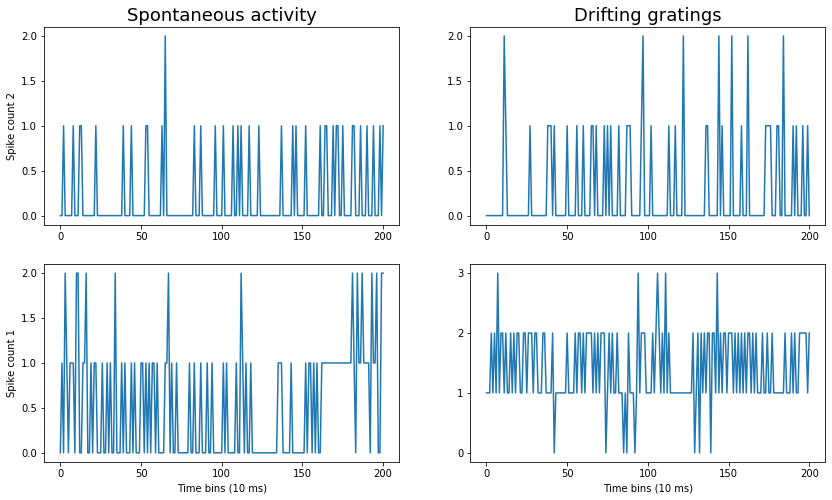

In [25]:
# plot the spike trains for which the correlogram will be computed

fig, axs = plt.subplots(2, 2,figsize=(14,8))
# update the figure size
plt.rcParams.update({'font.size': 15})

axs[0, 0].plot(spike_train_1_spont)
axs[0, 0].set_ylabel('Spike count 2')
axs[0, 0].set_title('Spontaneous activity')
axs[1, 0].plot(spike_train_2_spont)
axs[1 ,0].set_xlabel('Time bins (10 ms)')

axs[0, 1].plot(spike_train_1_drift)
axs[1, 0].set_ylabel('Spike count 1')
axs[0, 1].set_title('Drifting gratings')
axs[1, 1].plot(spike_train_2_drift)
axs[1 ,1].set_xlabel('Time bins (10 ms)')


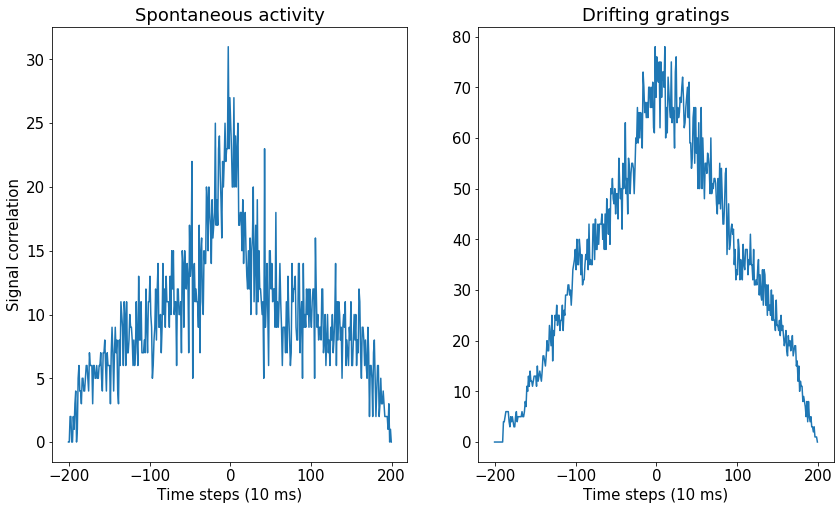

In [26]:
# plot the cross-correlations for spontaneous and drifting gratings

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.plot(time_shift_spont,xcorr_spont)
plt.ylabel('Signal correlation')
plt.xlabel('Time steps (10 ms)')
plt.title('Spontaneous activity')


plt.figure
plt.subplot(122)
plt.plot(time_shift_drift,xcorr_drift)
plt.xlabel('Time steps (10 ms)')
plt.title('Drifting gratings')
plt.show()


In [27]:
import scipy.stats as stats

# this is the full matrix of correlations, for now it is in zeros
correlations_spont = np.zeros((num_units_spont, num_units_spont))
correlations_drift = np.zeros((num_units_drift, num_units_drift))

units_to_show=100

# compute correlations for the spontaneous activity
for ii in range(units_to_show):
    for jj in range(units_to_show):
        # normalize spike trains before computation
        spike_train_1=spike_counts_spont[:, ii]
        spike_train_2=spike_counts_spont[:, jj]
        # we will compute only linear correlations
        correlations_spont[ii, jj] = stats.pearsonr(spike_train_1, spike_train_2)[0]
        # correlation for constant values is zero
        if np.isnan(correlations_spont[ii, jj]) == True:
            correlations_spont[ii, jj]=0


# compute correlations for drifting gratings
for ii in range(units_to_show):
    for jj in range(units_to_show):
        # normalize spike trains before computation
        spike_train_1=spike_counts_drift[:, ii]
        spike_train_2=spike_counts_drift[:, jj]
        # we will compute only linear correlations
        correlations_drift[ii, jj] = stats.pearsonr(spike_train_1, spike_train_2)[0]
        # correlation for constant values is zero
        if np.isnan(correlations_drift[ii, jj]) == True:
            correlations_drift[ii, jj]=0
            

/local1/storage/envs/allensdk3/lib/python3.6/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


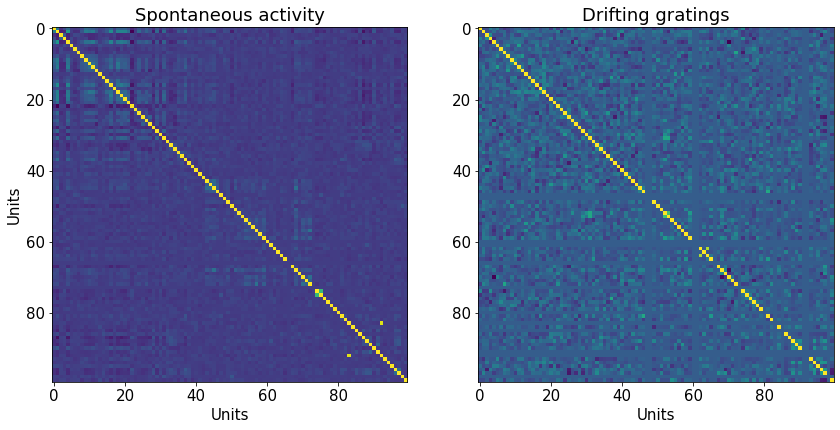

In [28]:
# plot correlation matrix with log10
# some units could be silent -> then there are no correlations

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(np.log10(correlations_spont[0:units_to_show,0:units_to_show]+1))
plt.xlabel('Units')
plt.ylabel('Units')
plt.title('Spontaneous activity')


plt.subplot(122)
plt.imshow(np.log10(correlations_drift[0:units_to_show,0:units_to_show]+1))
plt.title('Drifting gratings')
plt.xlabel('Units')
plt.show()


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 7: Spike waveform features</b> 
<br>Compute the spike duration for your selected list of units, and plot histogram of values.
<ol>
    <li>Concatenate waveforms in a matrix</li>
    <li>Compute location of trough and peak using np.argmax() and np.argmin()</li>
    <li>Compute difference between time of trough and peak</li>
    <li>Plot histogram of spikes duration (time between trough and peak)</li>
    <li>Bonus: construct a scatter plot comparing your results with the pre-calculated values in the units table, `session.units.waveform_duration`</li>
</ol>
</div>

In [29]:
peak_waveforms = []

for unit_id in unit_list:
    peak_ch = session.units.loc[unit_id, "peak_channel_id"]
    unit_mean_waveforms = session.mean_waveforms[unit_id]

    peak_waveforms.append(unit_mean_waveforms.loc[{"channel_id": peak_ch}])

In [30]:
# Concatenate waveforms into matrix
wv = np.array(peak_waveforms)

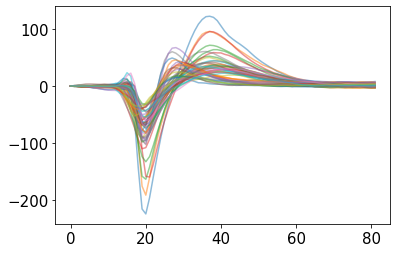

In [31]:
# Plot 100 waveforms in this data_set
fig,ax = plt.subplots(1,1,figsize=(6,4))
for w in wv[:100]:
    ax.plot(w,alpha=0.5)

In [32]:
# Compute trough-to-peak duration
duration_steps = np.argmax(wv,axis=1) - np.argmin(wv,axis=1)
# Pull the sampling rate from the units table and convert timesteps to ms
sampling_rate = session.units.loc[unit_list, "sampling_rate"]
duration = duration_steps/sampling_rate*1000

Text(0.5, 0, 'Spike duration (ms)')

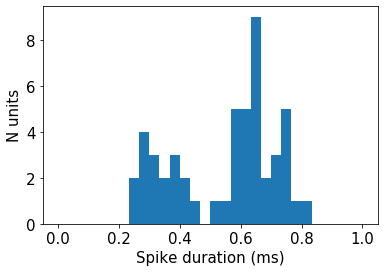

In [33]:
# Plot histogram of duration
plt.hist(duration, bins=30, range=(0,1));
plt.ylabel('N units')
plt.xlabel('Spike duration (ms)')

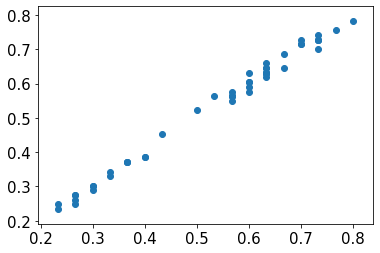

In [34]:
duration_stored = session.units.loc[unit_list, "waveform_duration"]
plt.scatter(duration, duration_stored)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 8: Spike-field relationships</b> 
<br>
The LFP is the product of the coordinated activity of a large number of cells localized near the probe, many more than those for which we have identified spikes. Thus, one way of understanding relationships between single neurons and the population is to look at relationships between spike times and the LFP. 
<br>
Here we will calculate the spike-triggered average of the LFP signal. If a certain pattern is repeated in the LFP whenever the cell fires, the averaging will help to isolate this signal and average out the noise. 
<ol>
    <li>Pick a unit, extract the LFP for the channel closest to it's peak channel, and select a subset of spikes to work with. (Working with the full dataset across channels and across all spiikes would take quite a while.) </li>
    <li>For each spike time of the unit, pick out a fixed window of the LFP aligned around the spike time. </li>
    <li>Average the windowed LFP signals to compute the spike-triggered average, and plot the results.</li>
</ol>
</div>

In [35]:
# Get spike times and channel info for a single unit
unit_id = session.units.index.values[0]
spikes = session.spike_times[unit_id]
peak_ch = session.units.loc[unit_id, "peak_channel_id"]
probe_id = session.units.loc[unit_id, "probe_id"]

In [36]:
lfp_full = session.get_lfp(probe_id)

In [37]:
channels = lfp_full.channel.values
channel_closest = channels[np.argmin(np.abs(channels-peak_ch))]

lfp_peak = lfp_full.loc[dict(channel=channel_closest)]

In [38]:
# Time before and after spike
pre_time = 1.
post_time = 1.
array_length = int(np.floor((pre_time+post_time)/(lfp_peak.time.values[1]-lfp_peak.time.values[0])))

# Make list that will contain the LFP around each spike
spike_triggered_lfp = []

spikes_subset = spikes[1000:-1000:50]
#Loop through every spike
for i, spike in enumerate(spikes_subset):
    
    t0 = spike - pre_time
    t1 = spike + post_time
    lfp_subset = lfp_peak.loc[dict(time=slice(t0, t1))].values[:array_length]
    
    spike_triggered_lfp.append(lfp_subset)

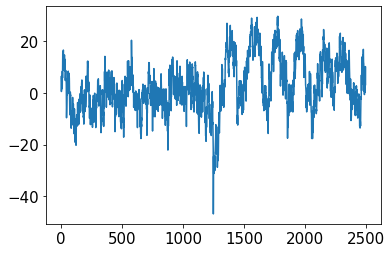

In [39]:
spike_triggered_lfp = np.array(spike_triggered_lfp)
sta_lfp = np.mean(spike_triggered_lfp, axis=0)

plt.plot(sta_lfp)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<b>Exercise 9: Instantaneous phase of oscillatory LFP signals</b> 
<br>
Another way to analyze how an oscillatory signal varies with time is to extract its instantaneous amplitude using a mathematical tool called the Hilbert transform. The function `scipy.signal.hilbert` adds a second dimension to a signal (as a complex variable), such that the resulting *analytic signal* now has a well-defined nonzero amplitude and phase at every instant in time! (See http://www.rdgao.com/roemerhasit_Hilbert_Transform/ for a nice explanation.)
<br>
Note that these instantaneous amplitude and phase could be a starting point for more complex analysis of relationships between spike times and the LFP, or between LFP signals in different regions. We won't have time to get into that here!
<ol>
    <li>Working with a ~10 sec window of LFP from a single channel, find the peak frequency of the signal using the welsh periodogram.</li>
    <li>Filter the signal using the Butterworth filter, using a window of +/- 2 Hz around the peak frequency.</li>
    <li>Calculate the analytic signal from your filtered LFP </li>
    <li>Use `np.abs` and `np.angle` to calculate the amplitude and phase of the signal. Visualize the filtered LFP along with its amplitude and phase.</li>
</ol>
</div>

In [40]:
lfp_subset = lfp_peak.loc[dict(time=slice(10,20))]
v = lfp_subset.values
t = lfp_subset.time.values
fs = 1/(t[1]-t[0])

In [41]:
import scipy.signal
f, psd = scipy.signal.welch(v, fs, nperseg=1000)
f_peak = f[np.argmax(psd)]
print(f"peak frequency: {f_peak} Hz")

peak frequency: 6.249993046528965 Hz


In [42]:
freq_window = (f_peak-2, f_peak+2)
filt_order = 3
b, a = scipy.signal.butter(filt_order, freq_window, btype='bandpass', fs=fs)
v_filtered = scipy.signal.lfilter(b, a, v)

In [43]:
lfp_z = scipy.signal.hilbert(v_filtered)
lfp_amp = np.abs(lfp_z)
lfp_phase = np.angle(lfp_z)

Text(0, 0.5, 'Voltage (uV)')

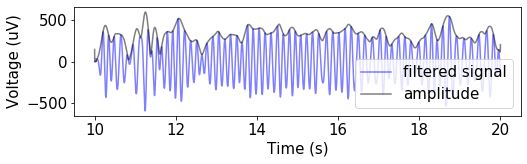

In [44]:
plt.figure(figsize=(8,2))
plt.plot(t, v_filtered,'b',label='filtered signal',alpha=.5)
plt.plot(t, lfp_amp,'k',label='amplitude',alpha=.5)
plt.legend(loc='best')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (uV)')

Text(0, 0.5, 'Phase (rad)')

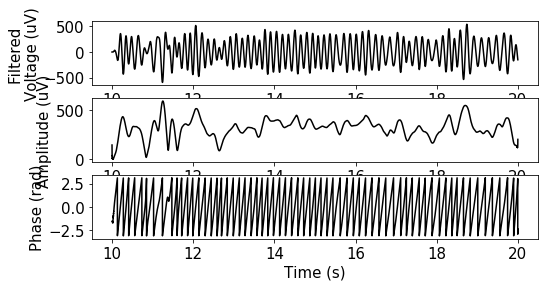

In [45]:
plt.figure(figsize=(8,4))
plt.subplot(3,1,1)
plt.plot(t, v_filtered,'k')
plt.ylabel('Filtered\nVoltage (uV)')
plt.subplot(3,1,2)
plt.plot(t, lfp_amp,'k')
plt.ylabel('Amplitude (uV)')
plt.subplot(3,1,3)
plt.plot(t, lfp_phase,'k')
plt.xlabel('Time (s)')
plt.ylabel('Phase (rad)')